In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
TsingTao = pd.read_csv('bitcoin_2012-01-01_to_2018-10-31.csv')
TsingTao.index = TsingTao.iloc[:,1]

In [29]:
TsingTao.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,,,,,,,,
4.465000,2011/12/31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
4.806667,2012/1/1,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
5.000000,2012/1/2,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
5.252500,2012/1/3,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
5.200000,2012/1/4,5.200000,5.223333,5.200000,5.223333,11.914807,63.119578,5.208159


In [30]:
TsingTao.Timestamp = pd.to_datetime(TsingTao.Timestamp)
TsingTao.index = TsingTao.Timestamp
TsingTao = TsingTao.iloc[:,1:]
TsingTao.head(n=3)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000


In [31]:
Close = TsingTao.Close

Text(0.5, 1.0, '比特币收盘价时序图')

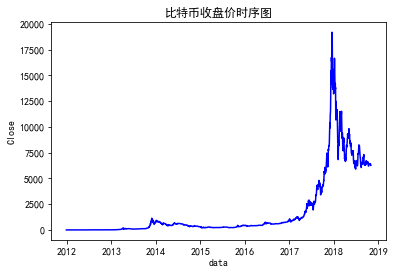

In [32]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close,'b')
plt.xlabel('data')
plt.ylabel("Close")
plt.title('比特币收盘价时序图')

In [33]:
#新增一个字段用来存放sma5的数据，sma代表简单易懂平均线5代表5天周期

In [34]:
sma5 = pd.Series(0.0,index=Close.index)
for i in range(4,len(Close)):
    sma5[i] = np.mean(Close[(i-4):(i+1)])
sma5.tail()

Timestamp
2018-10-27    6405.729595
2018-10-28    6407.147722
2018-10-29    6387.101400
2018-10-30    6359.823880
2018-10-31    6335.216514
dtype: float64

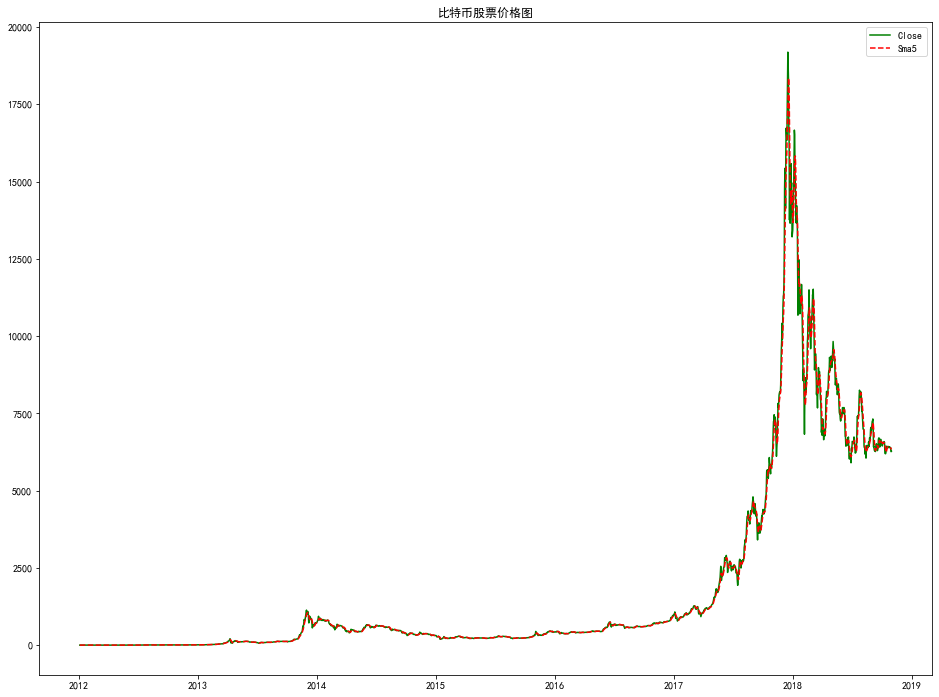

In [36]:
plt.figure(figsize=(16,12))
plt.plot(Close[4:],label='Close',color='g')
plt.plot(sma5[4:],label='Sma5',color='r',linestyle='dashed')
plt.title('比特币股票价格图')
plt.legend()

In [37]:
#增加一个字段，用来存放sma20的数据，sma代表简单移动平均线 20代表20天周期

In [41]:
sma20 = pd.Series(0.0,index=Close.index)
for i in range(19,len(Close)):
    sma20[i] = np.mean(Close[(i-19):(i+1)])
sma20.tail()

Timestamp
2018-10-27    6392.799750
2018-10-28    6383.505942
2018-10-29    6370.415743
2018-10-30    6357.860618
2018-10-31    6361.089875
dtype: float64

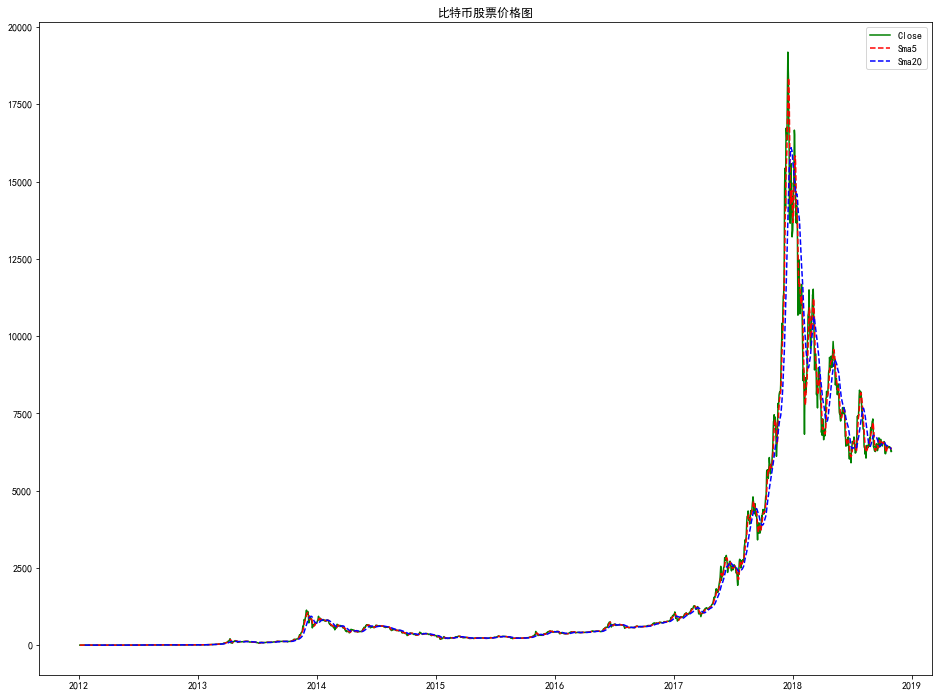

In [42]:
plt.figure(figsize=(16,12))
plt.plot(Close[4:],label='Close',color='g')
plt.plot(sma5[4:],label='Sma5',color='r',linestyle='dashed')
plt.plot(sma20[19:],label='Sma20',color='b',linestyle='dashed')
plt.title('比特币股票价格图')
plt.legend()

In [43]:
b = np.array([1,2,3,4,5])
w = b/sum(b)
print(w)

[0.06666667 0.13333333 0.2        0.26666667 0.33333333]


In [44]:
wma5 = pd.Series(0.0,index=Close.index)
for i in range(4,len(Close)):
    wma5[i] = sum(w*Close[(i-4):(i+1)])
wma5[0:7]

Timestamp
2011-12-31    0.000000
2012-01-01    0.000000
2012-01-02    0.000000
2012-01-03    0.000000
2012-01-04    5.081500
2012-01-05    5.525897
2012-01-06    5.902984
dtype: float64

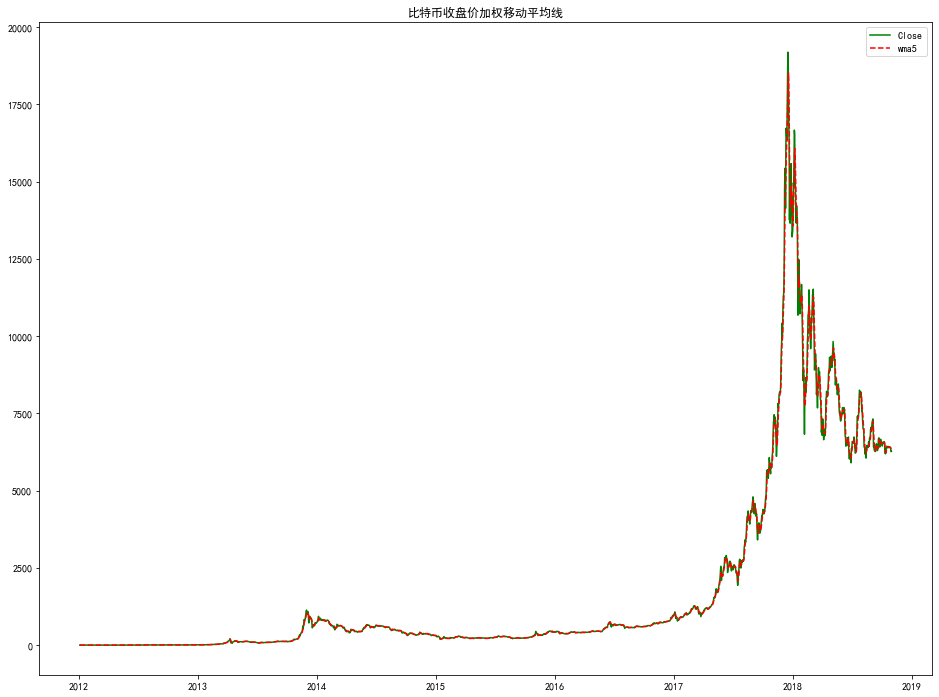

In [45]:
plt.figure(figsize=(16,12))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close[4:],label='Close',color='g')
plt.plot(wma5[4:],label='wma5',color='r',linestyle='dashed')
plt.title('比特币收盘价加权移动平均线')
plt.legend()

In [49]:
b = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
w2 = b/sum(b)
print(w2)


[0.00833333 0.01666667 0.025      0.03333333 0.04166667 0.05
 0.05833333 0.06666667 0.075      0.08333333 0.09166667 0.1
 0.10833333 0.11666667 0.125     ]


In [50]:
 wma15 = pd.Series(0.0,index=Close.index)
for i in range(14,len(Close)):
    wma15[i] = sum(w2*Close[(i-14):(i+1)])


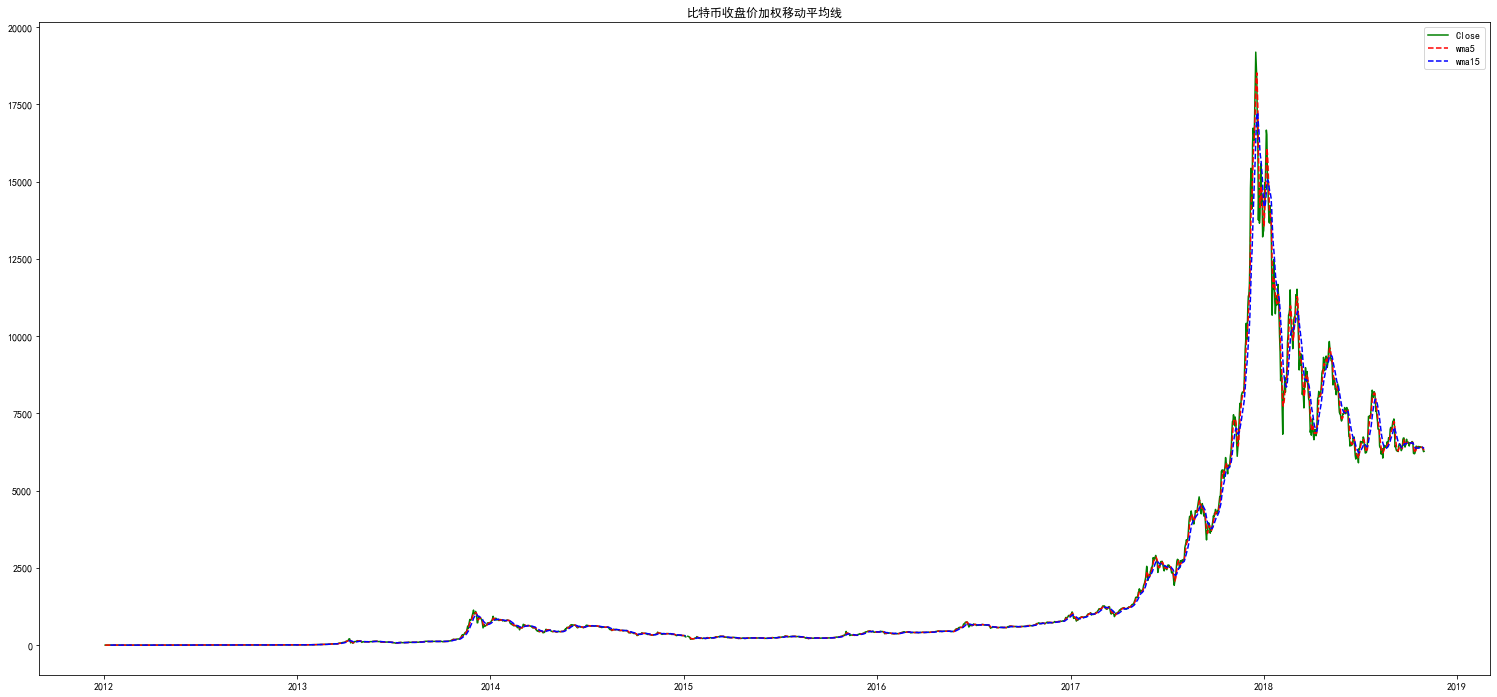

In [51]:
plt.figure(figsize=(26,12))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close[4:],label='Close',color='g')
plt.plot(wma5[4:],label='wma5',color='r',linestyle='dashed')
plt.plot(wma15[14:],label='wma15',color='b',linestyle='dashed')
plt.title('比特币收盘价加权移动平均线')
plt.legend()